In [14]:
%config IPCompleter.greedy=True

In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.linear_model import *
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import *
from catboost import CatBoostClassifier

In [2]:
df = pd.read_csv('dataset.csv', header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.511836,0.637170,-0.000010,0.474134,0.626778,-0.035878,0.445819,0.573410,-0.050437,0.450609,...,0.532901,0.481656,-0.036599,0.529117,0.526541,-0.034820,0.531054,0.538925,-0.017970,0.0
1,0.512659,0.640747,0.000006,0.474861,0.628449,-0.031801,0.446108,0.575793,-0.044379,0.450378,...,0.532023,0.482252,-0.034177,0.528137,0.527010,-0.032714,0.530419,0.540917,-0.015090,0.0
2,0.512647,0.643877,0.000006,0.475224,0.631744,-0.032067,0.445610,0.578251,-0.045439,0.448308,...,0.532393,0.487056,-0.034582,0.528770,0.532068,-0.032108,0.531391,0.544561,-0.013796,0.0
3,0.513159,0.650373,0.000011,0.474759,0.637161,-0.037138,0.444326,0.582447,-0.054681,0.449234,...,0.532103,0.494320,-0.039853,0.528124,0.540335,-0.038336,0.530639,0.547571,-0.021270,0.0
4,0.511280,0.658031,0.000008,0.472758,0.641175,-0.034334,0.443270,0.589702,-0.051933,0.446981,...,0.529289,0.500241,-0.043820,0.525938,0.546513,-0.044242,0.528643,0.551523,-0.029630,0.0


In [4]:
X = df.iloc[:,:63]
Y = df.iloc[:, 63]

x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size=0.25, shuffle=True, random_state=42)

In [52]:
y_test.iloc[2802:2803]

52430    14.0
Name: 63, dtype: float64

In [7]:
model = LogisticRegression(max_iter=400, n_jobs=-1)
# model = CatBoostClassifier(random_state=42)

In [35]:
scores = cross_val_score(model, X, Y, cv=10, scoring='accuracy', verbose=10, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:   40.6s remaining:  1.6min
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   41.1s remaining:   41.1s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   41.3s remaining:   17.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.1min finished


In [36]:
np.mean(scores), scores

(0.9899624999999999,
 array([0.986375, 0.994   , 0.9985  , 0.99175 , 0.992875, 0.972   ,
        0.98525 , 0.997375, 0.996875, 0.984625]))

In [37]:
np.mean(scores), scores

(0.9899624999999999,
 array([0.986375, 0.994   , 0.9985  , 0.99175 , 0.992875, 0.972   ,
        0.98525 , 0.997375, 0.996875, 0.984625]))

In [38]:
model.fit(X, Y)

LogisticRegression(max_iter=400, n_jobs=-1)

In [39]:
Y.nunique()

16

In [40]:
classes = Y.nunique()
filename = f'lr_{classes}.sav'
pickle.dump(model, open(f'../models/{filename}', 'wb'))

In [8]:
model.fit(x_train, y_train)
pred = model.predict(x_test)
accuracy_score(y_test, pred)

0.99345

In [62]:
error_idx = np.nonzero(y_test.to_numpy() - pred)[0]
idx = y_test.iloc[error_idx].index.values.astype(int)
mistakes = list(zip(idx, pred[error_idx], y_test.to_numpy()[error_idx]))

with open('wrong_predict.txt', 'w') as out:
    for line in mistakes:
        print(*line, file=out)

['(77774, 13.0, 19.0', ' (39802, 5.0, 9.0', ' (79845, 13.0, 19.0', ' (31494, 1.0, 8.0', ' (73401, 7.0, 18.0', ' (77764, 13.0, 19.0', ' (60330, 12.0, 16.0', ' (67861, 2.0, 17.0', ' (24103, 7.0, 5.0', ' (73416, 7.0, 18.0', ' (49867, 19.0, 13.0', ' (77184, 13.0, 19.0', ' (47555, 19.0, 13.0', ' (60343, 12.0, 16.0', ' (77930, 13.0, 19.0', ' (77745, 13.0, 19.0', ' (26002, 18.0, 7.0', ' (60014, 19.0, 16.0', ' (47906, 19.0, 13.0', ' (43858, 13.0, 12.0', ' (60345, 12.0, 16.0', ' (77191, 13.0, 19.0', ' (52430, 2.0, 14.0', ' (26001, 18.0, 7.0', ' (77796, 13.0, 19.0', ' (78627, 13.0, 19.0', ' (76931, 13.0, 19.0', ' (78037, 13.0, 19.0', ' (49881, 19.0, 13.0', ' (77769, 13.0, 19.0', ' (25967, 18.0, 7.0', ' (60368, 12.0, 16.0', ' (46584, 19.0, 13.0', ' (77776, 13.0, 19.0', ' (60322, 12.0, 16.0', ' (73417, 7.0, 18.0', ' (47916, 19.0, 13.0', ' (47932, 19.0, 13.0', ' (77183, 13.0, 19.0', ' (24562, 0.0, 5.0', ' (47110, 19.0, 13.0', ' (77751, 13.0, 19.0', ' (77742, 13.0, 19.0', ' (78036, 13.0, 19.0', ' (3

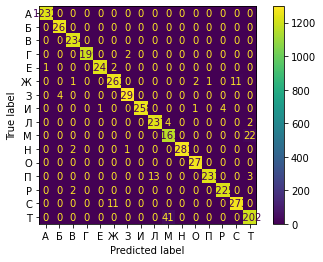

In [42]:
ALPH = ['А', 'Б', 'В', 'Г', 'Е', 'Ж', 'З', 'И', 'Л', 'М', 'Н', 'О', 'П', 'Р', 'С', 'Т']
plot_confusion_matrix(model, x_test, y_test, display_labels=ALPH)